In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from camera import Camera
import cv2
from ncnn.model_zoo import get_model

In [2]:
# helper function for drawing the result
def draw_detection_objects(image, class_names, objects, min_prob=0.0):
    for obj in objects:
        if obj.prob < min_prob:
            continue
    
        print(
            "%d = %.5f at %.2f %.2f %.2f x %.2f\n"
            % (obj.label, obj.prob, obj.rect.x, obj.rect.y, obj.rect.w, obj.rect.h)
        )
    
        cv2.rectangle(
            image,
            (int(obj.rect.x), int(obj.rect.y)),
            (int(obj.rect.x + obj.rect.w), int(obj.rect.y + obj.rect.h)),
            (255, 0, 0),
        )
    
        text = "%s %.1f%%" % (class_names[int(obj.label)], obj.prob * 100)
    
        label_size, baseLine = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    
        x = obj.rect.x
        y = obj.rect.y - label_size[1] - baseLine
        if y < 0:
            y = 0
        if x + label_size[0] > image.shape[1]:
            x = image.shape[1] - label_size[0]
    
        cv2.rectangle(
            image,
            (int(x), int(y)),
            (int(x + label_size[0]), int(y + label_size[1] + baseLine)),
            (255, 255, 255),
            -1,
        )
    
        cv2.putText(
            image,
            text,
            (int(x), int(y + label_size[1])),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 0, 0),
        )
    
    return image

In [3]:
# model: keep number of threads 1 or 2 and use_gpu to False
net = get_model("yolov4_tiny", num_threads=2, use_gpu=False)

2KB [00:00, 3095.43KB/s]             


11831KB [00:00, 13955.94KB/s]                           


In [7]:
"""
Initialize camera
"""
# camera
camera = Camera()
print("Camera connected: ", camera.connect())

Camera connected:  True


65 = 0.82380 at 499.34 193.97 333.18 x 251.53



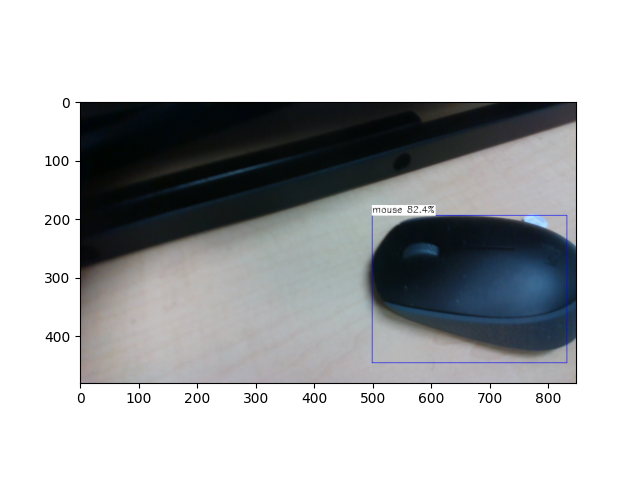

In [12]:
"""
detection loop
"""
# camera data
_, _, _, _, _, color_img, _, _, _= camera.get_all()

# detection
objects = net(color_img)

# draw result
draw_detection_objects(color_img, net.class_names, objects)

# Display the image
fig, ax = plt.subplots(frameon=False)
ax.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
"""
Always close the camera, once your application is over
"""
# terminate the session
camera.close()

True